In [1]:
from SL_C0de.grid import ICE_TIME_GRID
from SL_C0de.grid import SEDIMENT_TIME_GRID
from SL_C0de.grid import TOPOGRAPHIC_TIME_GRID
import matplotlib.pyplot as plt

ice_time_grid=ICE_TIME_GRID(from_file=(True,'ice_grid_64'))
sed_time_grid=SEDIMENT_TIME_GRID(from_file=(True,'sed_grid_64'))
topo_time_grid=TOPOGRAPHIC_TIME_GRID(from_file=(True,'topo_grid_64'))

In [3]:
topo_time_grid.grd=topo_time_grid.height_time_grid[-2,:,:]

In [3]:
topo_time_grid.coefftogrd()
delta=topo_time_grid.grd-topo_time_grid.height_time_grid[-2,:,:]

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_14144\3810363966.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


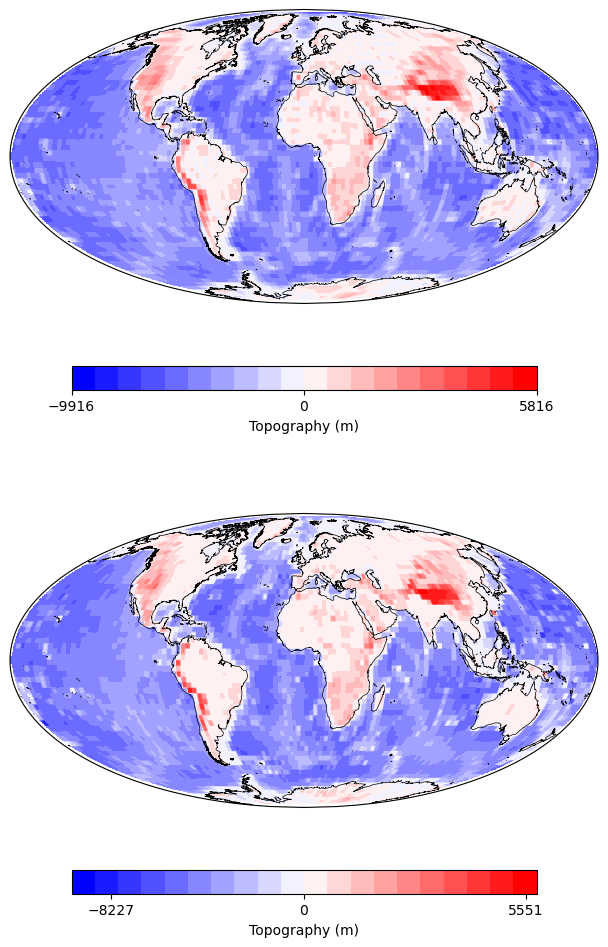

In [4]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax1  = plt.subplot(211, projection=ccrs.Mollweide())
ax1.set_global()
colormap = cmap
m = ax1.imshow(topo_time_grid.grd, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Topography (m)')
cbar.set_ticks([topo_time_grid.grd.min(), 0, topo_time_grid.grd.max()])
ax1.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax1.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)
ax2  = plt.subplot(212, projection=ccrs.Mollweide())
ax2.set_global()
colormap = cmap
m = ax2.imshow(topo_time_grid.height_time_grid[-2,:,:], origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Topography (m)')
cbar.set_ticks([topo_time_grid.height_time_grid[-2,:,:].min(), 0, topo_time_grid.height_time_grid[-2,:,:].max()])
ax2.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax2.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_14144\1543351459.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


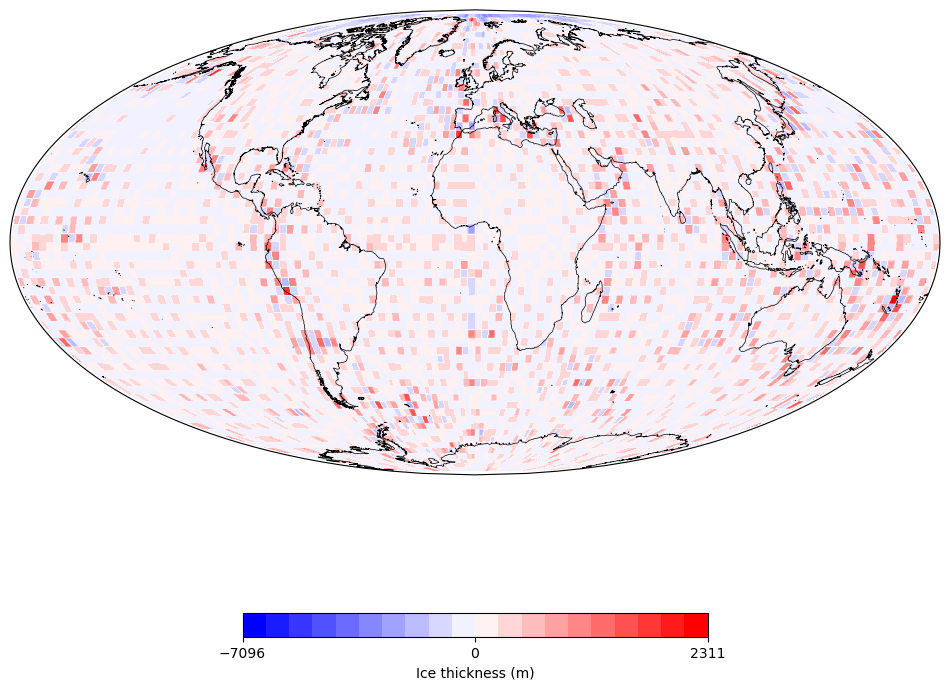

In [5]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=ccrs.Mollweide())
ax.set_global()
colormap = cmap
m = ax.imshow(delta, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Ice thickness (m)')
cbar.set_ticks([delta.min(), 0, delta.max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

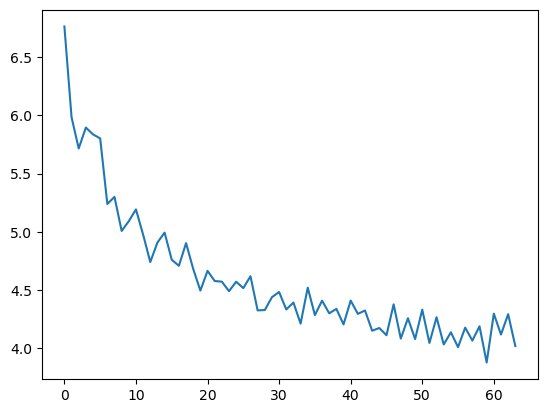

In [6]:
import pyshtools as pysh
coeff=np.stack((topo_time_grid.coeff.real,topo_time_grid.coeff.imag))
coeff=pysh.shio.SHCindexToCilm(coeff)
spec=pysh.spectralanalysis.spectrum(coeff)
deg=np.arange(topo_time_grid.maxdeg)
plt.plot(np.log10(spec))

In [7]:
hd_topo=topo_time_grid.coefftogrdhd(1024)

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_14144\2681940466.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


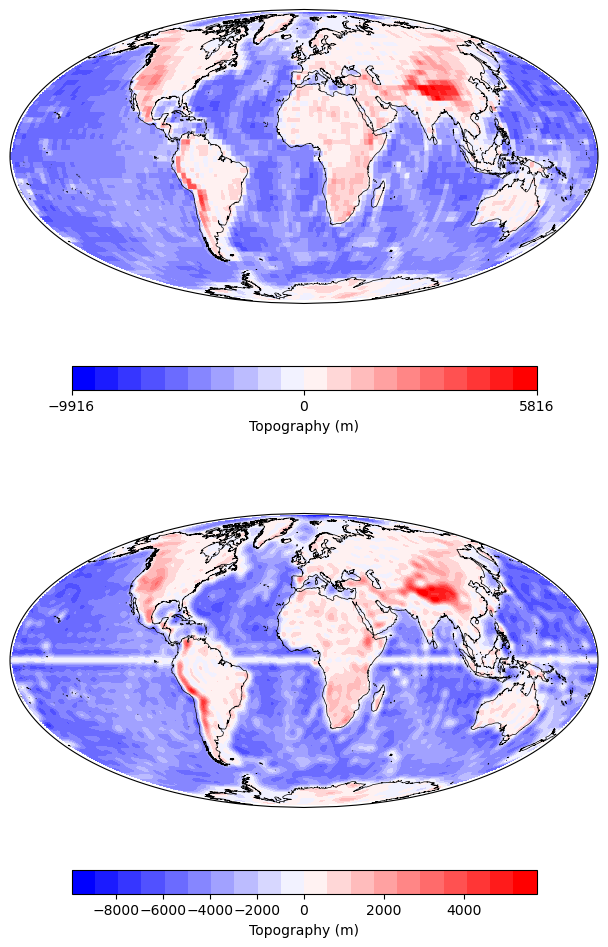

In [8]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax1  = plt.subplot(211, projection=ccrs.Mollweide())
ax1.set_global()
colormap = cmap
m = ax1.imshow(topo_time_grid.grd, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar1=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar1.set_label('Topography (m)')
cbar1.set_ticks([topo_time_grid.grd.min(), 0, topo_time_grid.grd.max()])
ax1.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax1.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

ax2  = plt.subplot(212, projection=ccrs.Mollweide())
ax2.set_global()
colormap = cmap
m = ax2.imshow(hd_topo, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar2=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar2.set_label('Topography (m)')
# cbar2.set_ticks([int(hd_topo.min()), 0, int(hd_topo.max())])
ax2.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax2.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)